# eXtreme Gradient Boosting (Reduced Featureset 1)
## Hyperparameter tuning is performed on reduced feature set 1

##  Get the data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation, metrics
from time import time
import pandas as pd
import collections

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_new              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_new             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_new                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_new               -> array([[-0.74031227,  0.23616372, -0.18182195, ...
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...

In [3]:
print("Training data: ", X_train_new.shape, "and labels: ", y_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_test_new), X_test_new[18].shape, "arrays for SNR values:")
print(sorted(X_test_new.keys()))

Training data:  (80000, 11) and labels:  (80000,)
 
Test data:
Total 20 (4000, 11) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


##  Train and test

In [4]:
#Unfold all test data into one array

from sklearn.utils import shuffle

X_test1 = []
y_test1 = []
for snr in snrs:
    X_test1.append(X_test_new[snr])
    y_test1.append(y_test[snr])

X_test1 = np.vstack(X_test1)
y_test1 = np.hstack(y_test1)
X_test1, y_test1 = shuffle(X_test1, y_test1)
print("Test set {} and labels {}".format(X_test1.shape, y_test1.shape))

Test set (80000, 11) and labels (80000,)


### Tune max_depth and min_child_weight

In [15]:
param_grid1 = {'max_depth':list(range(3,10,2)), 'min_child_weight': list(range(1,6,2))}

start = time()

grid_search1 = GridSearchCV(estimator = XGBClassifier(max_depth=3, eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid1, scoring='accuracy',n_jobs=4)

grid_search1.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 18.17933406829834 minutes


In [16]:
grid_search1.grid_scores_, grid_search1.best_params_, grid_search1.best_score_

([mean: 0.48840, std: 0.00100, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.48857, std: 0.00068, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.48857, std: 0.00117, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.49794, std: 0.00169, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.49734, std: 0.00118, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.49788, std: 0.00109, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.50115, std: 0.00082, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.50020, std: 0.00106, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.50191, std: 0.00165, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.50099, std: 0.00060, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.50176, std: 0.00050, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.50151, std: 0.00058, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 5

### Narrow down parameter values

In [17]:
param_grid2 = {'max_depth':[6,7,8], 'min_child_weight': [4,5,6]}

start = time()

grid_search2 = GridSearchCV(estimator = XGBClassifier(eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid2, scoring='accuracy',n_jobs=4)

grid_search2.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 16.33037612438202 minutes


In [18]:
grid_search2.grid_scores_, grid_search2.best_params_, grid_search2.best_score_

([mean: 0.50061, std: 0.00062, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.50123, std: 0.00135, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.50072, std: 0.00038, params: {'max_depth': 6, 'min_child_weight': 6},
  mean: 0.50245, std: 0.00179, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.50191, std: 0.00165, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.50174, std: 0.00092, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: 0.50305, std: 0.00042, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.50097, std: 0.00084, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.50165, std: 0.00122, params: {'max_depth': 8, 'min_child_weight': 6}],
 {'max_depth': 8, 'min_child_weight': 4},
 0.50305)

### Narrow down more

In [7]:
param_grid2_1 = {'max_depth':[7,8,9], 'min_child_weight': [4,5,6]}

start = time()

grid_search2_1 = GridSearchCV(estimator = XGBClassifier(eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid2_1, scoring='accuracy',n_jobs=4)

grid_search2_1.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 17.34668723344803 minutes


In [8]:
grid_search2_1.grid_scores_, grid_search2_1.best_params_, grid_search2_1.best_score_

([mean: 0.50245, std: 0.00179, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.50191, std: 0.00165, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.50174, std: 0.00092, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: 0.50305, std: 0.00042, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.50097, std: 0.00084, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.50165, std: 0.00122, params: {'max_depth': 8, 'min_child_weight': 6},
  mean: 0.50139, std: 0.00119, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: 0.50151, std: 0.00058, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.50105, std: 0.00059, params: {'max_depth': 9, 'min_child_weight': 6}],
 {'max_depth': 8, 'min_child_weight': 4},
 0.50305)

### Tune gamma, while setting max_depth and min_child_weight to optimum values

In [9]:
param_grid3 = {'gamma':[i/10.0 for i in range(0,5)]}

start = time()

grid_search3 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid3, scoring='accuracy',n_jobs=4)

grid_search3.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 10.950891117254892 minutes


In [10]:
grid_search3.grid_scores_, grid_search3.best_params_, grid_search3.best_score_

([mean: 0.50305, std: 0.00042, params: {'gamma': 0.0},
  mean: 0.50114, std: 0.00118, params: {'gamma': 0.1},
  mean: 0.50099, std: 0.00057, params: {'gamma': 0.2},
  mean: 0.50249, std: 0.00002, params: {'gamma': 0.3},
  mean: 0.50060, std: 0.00157, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.50305)

### Tune subsample and colsample_bytree; set max_depth, min_child_weight and gamma to optimum values

In [6]:
param_grid4 = {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}

start = time()

grid_search4 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid4, scoring='accuracy',n_jobs=4)

grid_search4.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 20.987338531017304 minutes


In [7]:
grid_search4.grid_scores_, grid_search4.best_params_, grid_search4.best_score_

([mean: 0.49939, std: 0.00132, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.49976, std: 0.00182, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.50072, std: 0.00094, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.50185, std: 0.00099, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.50104, std: 0.00141, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.50235, std: 0.00136, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.50225, std: 0.00050, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.50149, std: 0.00105, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.50010, std: 0.00265, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.50087, std: 0.00039, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.50101, std: 0.00096, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.50252, std: 0.00146, params: {'subsample': 0.9, 'colsample_bytree'

### Narrow down search space for subsample and colsample_bytree

In [9]:
param_grid5 = {'subsample': [i/100.0 for i in range(75,100,5)],
               'colsample_bytree':  [i/100.0 for i in range(75,100,5)]}

start = time()

grid_search5 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid5, scoring='accuracy',n_jobs=4)

grid_search5.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 35.129989846547446 minutes


In [10]:
grid_search5.grid_scores_, grid_search5.best_params_, grid_search5.best_score_

([mean: 0.50114, std: 0.00044, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.50101, std: 0.00096, params: {'colsample_bytree': 0.75, 'subsample': 0.8},
  mean: 0.50161, std: 0.00097, params: {'colsample_bytree': 0.75, 'subsample': 0.85},
  mean: 0.50252, std: 0.00146, params: {'colsample_bytree': 0.75, 'subsample': 0.9},
  mean: 0.50206, std: 0.00027, params: {'subsample': 0.95, 'colsample_bytree': 0.75},
  mean: 0.50114, std: 0.00044, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: 0.50101, std: 0.00096, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.50161, std: 0.00097, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.50252, std: 0.00146, params: {'colsample_bytree': 0.8, 'subsample': 0.9},
  mean: 0.50206, std: 0.00027, params: {'colsample_bytree': 0.8, 'subsample': 0.95},
  mean: 0.50248, std: 0.00106, params: {'colsample_bytree': 0.85, 'subsample': 0.75},
  mean: 0.50226, std: 0.00064, params: {'subsample': 0.8, 'cols

### Fit the model to data and evaluate learning curves- inspect overfitting

In [18]:
#Model with optimum values of hyperprameters 
model = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0, subsample= 0.9, colsample_bytree= 0.85,
                    eta=0.3, objective='multi:softprob', 
                    num_class=8, early_stopping_rounds=20)

eval_set = [(X_train_new, y_train), (X_test1, y_test1)]

#We evaluate the model's performance on training and test sets by three evaluation metrics
# https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
model.fit(X_train_new, y_train, eval_set = eval_set, eval_metric=["merror", "mlogloss"])

[0]	validation_0-merror:0.492825	validation_0-mlogloss:1.93984	validation_1-merror:0.510938	validation_1-mlogloss:1.94295
[1]	validation_0-merror:0.486225	validation_0-mlogloss:1.84224	validation_1-merror:0.506325	validation_1-mlogloss:1.8483
[2]	validation_0-merror:0.48045	validation_0-mlogloss:1.76229	validation_1-merror:0.504938	validation_1-mlogloss:1.77096
[3]	validation_0-merror:0.477937	validation_0-mlogloss:1.69532	validation_1-merror:0.503213	validation_1-mlogloss:1.70654
[4]	validation_0-merror:0.477	validation_0-mlogloss:1.63946	validation_1-merror:0.5025	validation_1-mlogloss:1.65304
[5]	validation_0-merror:0.475188	validation_0-mlogloss:1.59176	validation_1-merror:0.502	validation_1-mlogloss:1.60751
[6]	validation_0-merror:0.472988	validation_0-mlogloss:1.54903	validation_1-merror:0.50135	validation_1-mlogloss:1.56713
[7]	validation_0-merror:0.47055	validation_0-mlogloss:1.51181	validation_1-merror:0.500713	validation_1-mlogloss:1.53209
[8]	validation_0-merror:0.469275	val

[68]	validation_0-merror:0.4063	validation_0-mlogloss:1.09125	validation_1-merror:0.490387	validation_1-mlogloss:1.19006
[69]	validation_0-merror:0.405475	validation_0-mlogloss:1.09013	validation_1-merror:0.490725	validation_1-mlogloss:1.18982
[70]	validation_0-merror:0.404637	validation_0-mlogloss:1.08886	validation_1-merror:0.490712	validation_1-mlogloss:1.18942
[71]	validation_0-merror:0.403075	validation_0-mlogloss:1.08719	validation_1-merror:0.490763	validation_1-mlogloss:1.18909
[72]	validation_0-merror:0.401762	validation_0-mlogloss:1.08556	validation_1-merror:0.491338	validation_1-mlogloss:1.18891
[73]	validation_0-merror:0.400512	validation_0-mlogloss:1.08413	validation_1-merror:0.491275	validation_1-mlogloss:1.18851
[74]	validation_0-merror:0.398475	validation_0-mlogloss:1.08252	validation_1-merror:0.491125	validation_1-mlogloss:1.18831
[75]	validation_0-merror:0.397575	validation_0-mlogloss:1.08128	validation_1-merror:0.490775	validation_1-mlogloss:1.18808
[76]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, early_stopping_rounds=20, eta=0.3, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=8, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

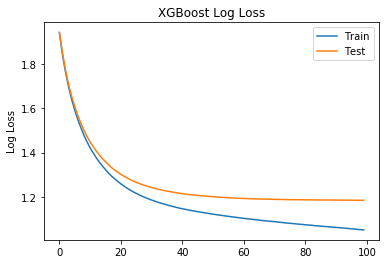

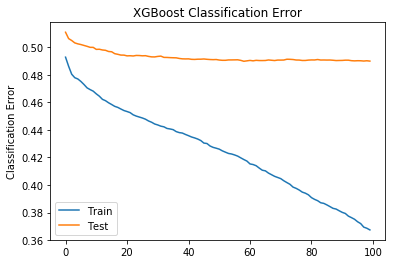

In [19]:
%matplotlib inline

results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Tune reg_alpha

In [20]:
param_grid6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

start = time()

grid_search6 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      subsample = 0.9, colsample_bytree = 0.85, 
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid6, scoring='accuracy',n_jobs=4)

grid_search6.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 9.831018881003063 minutes


In [21]:
grid_search6.grid_scores_, grid_search6.best_params_, grid_search6.best_score_

([mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-05},
  mean: 0.50400, std: 0.00051, params: {'reg_alpha': 0.01},
  mean: 0.50276, std: 0.00169, params: {'reg_alpha': 0.1},
  mean: 0.50376, std: 0.00103, params: {'reg_alpha': 1},
  mean: 0.48825, std: 0.00087, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.504)

### Narrow down search space for reg_alpha

In [26]:
param_grid7 = {'reg_alpha':[1e-7, 1e-6, 1e-5, 1e-4]}

start = time()

grid_search7 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      subsample = 0.9, colsample_bytree = 0.85, 
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid7, scoring='accuracy',n_jobs=4)

grid_search7.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 8.637335697809855 minutes


In [27]:
grid_search7.grid_scores_, grid_search7.best_params_, grid_search7.best_score_

([mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-07},
  mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-06},
  mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-05},
  mean: 0.50328, std: 0.00029, params: {'reg_alpha': 0.0001}],
 {'reg_alpha': 1e-07},
 0.504)

In [28]:
param_grid7_1 = {'reg_alpha':[1e-9, 1e-8, 1e-7, 1e-6]}

start = time()

grid_search7_1 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      subsample = 0.9, colsample_bytree = 0.85, 
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid7_1, scoring='accuracy',n_jobs=4)

grid_search7_1.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 8.397151724497478 minutes


In [29]:
grid_search7_1.grid_scores_, grid_search7_1.best_params_, grid_search7_1.best_score_

([mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-09},
  mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-08},
  mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-07},
  mean: 0.50400, std: 0.00057, params: {'reg_alpha': 1e-06}],
 {'reg_alpha': 1e-09},
 0.504)

#### the score does not improve and remains at 50.4, hence stop further search for reg_alpha

### Tune reg_lambda

In [30]:
param_grid8 = {'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]}

start = time()

grid_search8 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      subsample = 0.9, colsample_bytree = 0.85, reg_alpha= 1e-9,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid8, scoring='accuracy',n_jobs=4)

grid_search8.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 10.219808125495911 minutes


In [31]:
grid_search8.grid_scores_, grid_search8.best_params_, grid_search8.best_score_

([mean: 0.50216, std: 0.00087, params: {'reg_lambda': 1e-05},
  mean: 0.50254, std: 0.00156, params: {'reg_lambda': 0.01},
  mean: 0.50123, std: 0.00143, params: {'reg_lambda': 0.1},
  mean: 0.50400, std: 0.00057, params: {'reg_lambda': 1},
  mean: 0.50075, std: 0.00170, params: {'reg_lambda': 100}],
 {'reg_lambda': 1},
 0.504)

### Narrow down search space for reg_lambda

In [32]:
param_grid8_1 = {'reg_lambda':[0.9, 1, 2, 3]}

start = time()

grid_search8_1 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      subsample = 0.9, colsample_bytree = 0.85, reg_alpha= 1e-9,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid8_1, scoring='accuracy',n_jobs=4)

grid_search8_1.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 8.302910168965658 minutes


In [33]:
grid_search8_1.grid_scores_, grid_search8_1.best_params_, grid_search8_1.best_score_

([mean: 0.50260, std: 0.00093, params: {'reg_lambda': 0.9},
  mean: 0.50400, std: 0.00057, params: {'reg_lambda': 1},
  mean: 0.50171, std: 0.00131, params: {'reg_lambda': 2},
  mean: 0.50430, std: 0.00154, params: {'reg_lambda': 3}],
 {'reg_lambda': 3},
 0.5043)

### Score imporves from 50.4 to 50.43, hence continue searching for reg_lambda

In [36]:
param_grid8_2 = {'reg_lambda': list(range(3, 20, 3))}

start = time()

grid_search8_2 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0,
                                                      subsample = 0.9, colsample_bytree = 0.85, reg_alpha= 1e-9,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid8_2, scoring='accuracy',n_jobs=4)

grid_search8_2.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 11.91230006615321 minutes


In [37]:
grid_search8_1.grid_scores_, grid_search8_1.best_params_, grid_search8_1.best_score_

([mean: 0.50260, std: 0.00093, params: {'reg_lambda': 0.9},
  mean: 0.50400, std: 0.00057, params: {'reg_lambda': 1},
  mean: 0.50171, std: 0.00131, params: {'reg_lambda': 2},
  mean: 0.50430, std: 0.00154, params: {'reg_lambda': 3}],
 {'reg_lambda': 3},
 0.5043)

### Tune learning_rate 
guide: https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

In [41]:
param_grid9 = {'learning_rate': [1e-4, 0.1e-3, 1e-2, 1e-1, 0.2, 0.3]}

start = time()

grid_search9 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0, subsample = 0.9, 
                                                      colsample_bytree = 0.85, reg_alpha= 1e-9, reg_lambda= 3, 
                                                      objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid9, scoring='accuracy',n_jobs=4)

grid_search9.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 12.011093509197234 minutes


In [42]:
grid_search9.grid_scores_, grid_search9.best_params_, grid_search9.best_score_

([mean: 0.49074, std: 0.00143, params: {'learning_rate': 0.0001},
  mean: 0.49074, std: 0.00143, params: {'learning_rate': 0.0001},
  mean: 0.49486, std: 0.00051, params: {'learning_rate': 0.01},
  mean: 0.50430, std: 0.00154, params: {'learning_rate': 0.1},
  mean: 0.49940, std: 0.00172, params: {'learning_rate': 0.2},
  mean: 0.49776, std: 0.00083, params: {'learning_rate': 0.3}],
 {'learning_rate': 0.1},
 0.5043)

## Train classifier with optimum hyperparameter values

In [45]:
from sklearn import metrics

model = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0, subsample = 0.9, 
                      colsample_bytree = 0.85, reg_alpha= 1e-9, reg_lambda= 3, learning_rate = 0.1,
                      objective='multi:softprob', num_class=8, early_stopping_rounds=20)


eval_set = [(X_train_new, y_train), (X_test1, y_test1)]
model.fit(X_train_new, y_train, eval_set = eval_set, eval_metric=["merror", "mlogloss"], verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, early_stopping_rounds=20, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=8, objective='multi:softprob',
       random_state=0, reg_alpha=1e-09, reg_lambda=3, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

## Test the classifier

In [49]:
from sklearn.metrics import accuracy_score

predictions = defaultdict(list)
accuracy = defaultdict(list)
y_pred = defaultdict(list)

for snr in snrs:
    y_pred[snr] = model.predict(X_test_new[snr])
    predictions[snr] = [round(value) for value in y_pred[snr]]
    accuracy[snr] = accuracy_score(y_test[snr], predictions[snr])
    print ("Test accuracy at ",snr,"dB =", accuracy[snr])

Test accuracy at  -20 dB = 0.127
Test accuracy at  -18 dB = 0.1235
Test accuracy at  -16 dB = 0.12425
Test accuracy at  -14 dB = 0.12875
Test accuracy at  -12 dB = 0.14625
Test accuracy at  -10 dB = 0.1915
Test accuracy at  -8 dB = 0.286
Test accuracy at  -6 dB = 0.36175
Test accuracy at  -4 dB = 0.4055
Test accuracy at  -2 dB = 0.452
Test accuracy at  0 dB = 0.52375
Test accuracy at  2 dB = 0.64625
Test accuracy at  4 dB = 0.79425
Test accuracy at  6 dB = 0.82325
Test accuracy at  8 dB = 0.82825
Test accuracy at  10 dB = 0.85275
Test accuracy at  12 dB = 0.85175
Test accuracy at  14 dB = 0.85775
Test accuracy at  16 dB = 0.844
Test accuracy at  18 dB = 0.8525


## Visualize model performance

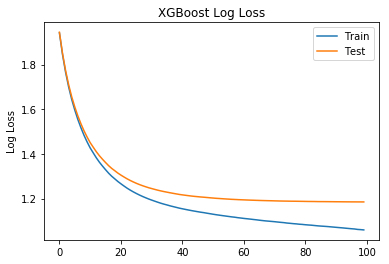

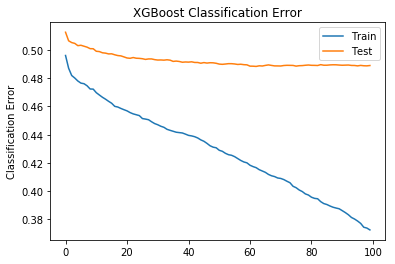

In [50]:
%matplotlib inline

results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

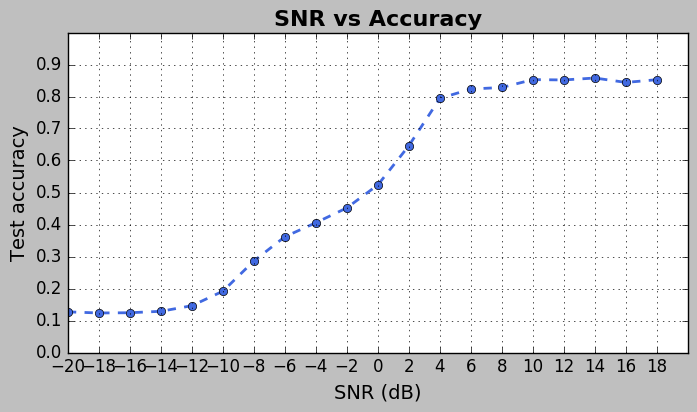

In [51]:
plt.style.use('classic')
acc_test = sorted(accuracy.items())
new_acc = []
for i in range(len(acc_test)):
    new_acc.append(acc_test[i][1])
acc_test_values = new_acc 

fig1 = plt.figure(figsize=(8,4), dpi=100)
x = snrs
y = list(acc_test_values)
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.86  0.00   0.00  0.00  0.00   0.06   0.07  0.01
BPSK   0.00  0.97   0.00  0.00  0.02   0.00   0.00  0.01
CPFSK  0.01  0.00   0.97  0.01  0.00   0.00   0.01  0.00
GFSK   0.01  0.00   0.05  0.93  0.00   0.00   0.01  0.00
PAM4   0.00  0.02   0.00  0.00  0.96   0.01   0.01  0.00
QAM16  0.02  0.00   0.00  0.00  0.00   0.57   0.41  0.00
QAM64  0.01  0.00   0.00  0.00  0.00   0.40   0.58  0.00
QPSK   0.03  0.00   0.00  0.00  0.00   0.06   0.01  0.90


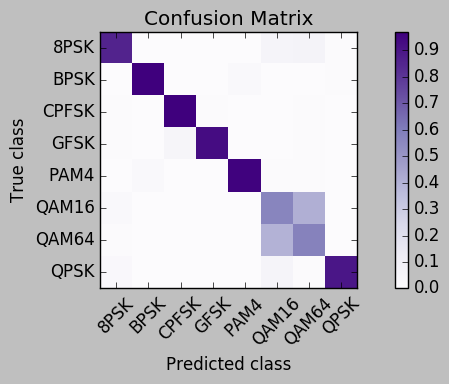

In [52]:
# Confusion Matrix
    
from sklearn.metrics import confusion_matrix

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
conf_matrix = confusion_matrix(y_pred[18], y_test[18])  

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

##  Use xbg library (rather than sklearn xgboost wrapper)

### Form dmatrices required by xgb

In [53]:
dtrain = xgb.DMatrix(X_train_new, label=y_train)
dtest = defaultdict(list)

for snr in snrs:
    dtest[snr] = xgb.DMatrix(X_test_new[snr], label=y_test[snr])

### n_boost_rounds = 100 = default # of estimators 
(num_boost_round = no. of trees to train)

In [59]:
xgbclassifier_model = model  #model whose hyperparameters we tuned
parameters = xgbclassifier_model.get_xgb_params()

#Use cross validation to set n_estimators 
eval_history = xgb.cv(parameters, dtrain, metrics = ['mlogloss', 'merror'], nfold = 5, early_stopping_rounds = 20,
                         num_boost_round = xgbclassifier_model.get_params()['n_estimators'])
xgbclassifier_model.set_params(n_estimators = eval_history.shape[0])

xgbclassifier_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, early_stopping_rounds=20, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=8, objective='multi:softprob',
       random_state=0, reg_alpha=1e-09, reg_lambda=3, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

In [65]:
eval_set = [(X_train_new, y_train), (X_test1, y_test1)]
start = time()
xgbclassifier_model.fit(X_train_new, y_train, eval_metric = ['mlogloss','merror'], 
                        eval_set = eval_set) #fit model to data
print("Fitting model to data took {} minutes".format((time() - start)/60))

[0]	validation_0-mlogloss:1.94242	validation_0-merror:0.49605	validation_1-mlogloss:1.94496	validation_1-merror:0.5125
[1]	validation_0-mlogloss:1.84592	validation_0-merror:0.487038	validation_1-mlogloss:1.85107	validation_1-merror:0.50645
[2]	validation_0-mlogloss:1.76645	validation_0-merror:0.481887	validation_1-mlogloss:1.77405	validation_1-merror:0.505188
[3]	validation_0-mlogloss:1.70012	validation_0-merror:0.4801	validation_1-mlogloss:1.70999	validation_1-merror:0.504613
[4]	validation_0-mlogloss:1.64396	validation_0-merror:0.478	validation_1-mlogloss:1.65611	validation_1-merror:0.503012
[5]	validation_0-mlogloss:1.59659	validation_0-merror:0.4765	validation_1-mlogloss:1.61064	validation_1-merror:0.503287
[6]	validation_0-mlogloss:1.55416	validation_0-merror:0.476088	validation_1-mlogloss:1.57024	validation_1-merror:0.502612
[7]	validation_0-mlogloss:1.5172	validation_0-merror:0.474625	validation_1-mlogloss:1.53524	validation_1-merror:0.50195
[8]	validation_0-mlogloss:1.48358	val

[68]	validation_0-mlogloss:1.09912	validation_0-merror:0.410363	validation_1-mlogloss:1.1907	validation_1-merror:0.488687
[69]	validation_0-mlogloss:1.09788	validation_0-merror:0.409362	validation_1-mlogloss:1.19039	validation_1-merror:0.488663
[70]	validation_0-mlogloss:1.09665	validation_0-merror:0.409038	validation_1-mlogloss:1.18992	validation_1-merror:0.488613
[71]	validation_0-mlogloss:1.09513	validation_0-merror:0.408237	validation_1-mlogloss:1.18957	validation_1-merror:0.488963
[72]	validation_0-mlogloss:1.09371	validation_0-merror:0.407063	validation_1-mlogloss:1.18925	validation_1-merror:0.4891
[73]	validation_0-mlogloss:1.09244	validation_0-merror:0.406	validation_1-mlogloss:1.18897	validation_1-merror:0.489062
[74]	validation_0-mlogloss:1.09063	validation_0-merror:0.403488	validation_1-mlogloss:1.18876	validation_1-merror:0.489013
[75]	validation_0-mlogloss:1.0894	validation_0-merror:0.402487	validation_1-mlogloss:1.18851	validation_1-merror:0.488525
[76]	validation_0-mlogl

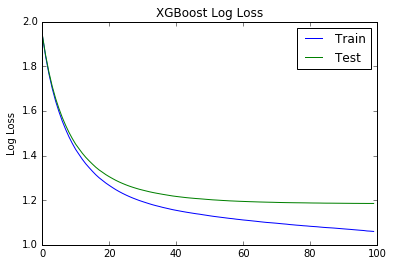

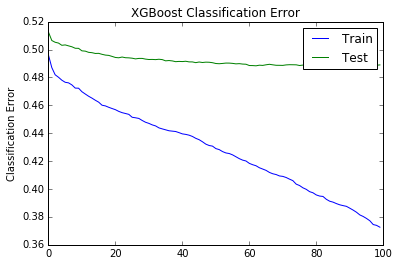

In [66]:
%matplotlib inline

results_xgbclassifier = xgbclassifier_model.evals_result()
epochs = len(results_xgbclassifier_xgbclassifier['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results_xgbclassifier['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier['validation_0']['merror'], label='Train')
ax.plot(x_axis, results_xgbclassifier['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [76]:
from sklearn.metrics import accuracy_score

predictions = defaultdict(list)
accuracy = defaultdict(list)
y_pred = defaultdict(list)

for snr in snrs:
    y_pred[snr] = xgbclassifier_model.predict(X_test_new[snr])
    predictions[snr] = [round(value) for value in y_pred[snr]]
    accuracy[snr] = accuracy_score(y_test[snr], predictions[snr])
    print ("Test accuracy at ",snr,"dB =", accuracy[snr])

Test accuracy at  -20 dB = 0.1255
Test accuracy at  -18 dB = 0.12325
Test accuracy at  -16 dB = 0.1225
Test accuracy at  -14 dB = 0.1295
Test accuracy at  -12 dB = 0.1405
Test accuracy at  -10 dB = 0.1895
Test accuracy at  -8 dB = 0.25975
Test accuracy at  -6 dB = 0.34725
Test accuracy at  -4 dB = 0.40125
Test accuracy at  -2 dB = 0.45375
Test accuracy at  0 dB = 0.531
Test accuracy at  2 dB = 0.65
Test accuracy at  4 dB = 0.7845
Test accuracy at  6 dB = 0.81925
Test accuracy at  8 dB = 0.82875
Test accuracy at  10 dB = 0.852
Test accuracy at  12 dB = 0.8525
Test accuracy at  14 dB = 0.85425
Test accuracy at  16 dB = 0.84275
Test accuracy at  18 dB = 0.848


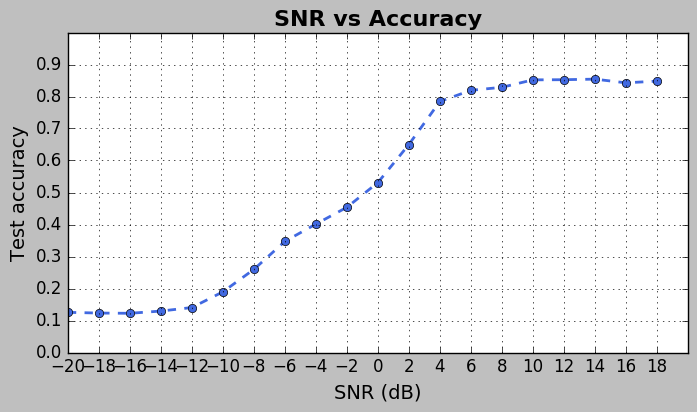

In [77]:
plt.style.use('classic')
acc_test = sorted(accuracy.items())
new_acc = []
for i in range(len(acc_test)):
    new_acc.append(acc_test[i][1])
acc_test_values = new_acc 

fig1 = plt.figure(figsize=(8,4), dpi=100)
x = snrs
y = list(acc_test_values)
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.86  0.00   0.00  0.00  0.00   0.06   0.07  0.01
BPSK   0.00  0.97   0.00  0.00  0.02   0.00   0.01  0.01
CPFSK  0.01  0.00   0.98  0.01  0.00   0.00   0.00  0.00
GFSK   0.01  0.00   0.04  0.94  0.00   0.00   0.01  0.00
PAM4   0.00  0.02   0.00  0.00  0.96   0.01   0.01  0.00
QAM16  0.02  0.00   0.00  0.00  0.00   0.55   0.44  0.00
QAM64  0.01  0.00   0.00  0.00  0.00   0.43   0.55  0.00
QPSK   0.03  0.00   0.00  0.00  0.00   0.05   0.01  0.90


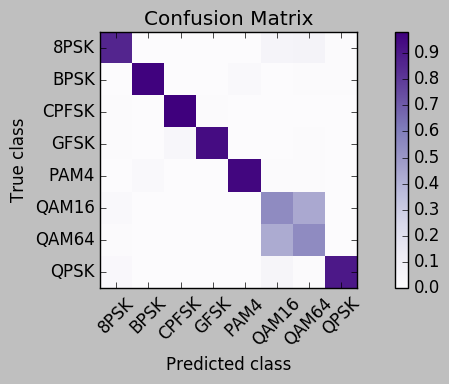

In [78]:
# Confusion Matrix
    
from sklearn.metrics import confusion_matrix

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
conf_matrix = confusion_matrix(y_pred[18], y_test[18])  

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

### num_boost_round = 300; n_estimators = 300

In [70]:
xgbclassifier_model2 = model  #model whose hyperparameters we tuned
parameters = xgbclassifier_model2.get_xgb_params()

#Use cross validation to set n_estimators
start = time()
eval_history = xgb.cv(parameters, dtrain, metrics = ['mlogloss', 'merror'], nfold = 5, early_stopping_rounds = 20,
                         num_boost_round = 300)
xgbclassifier_model2.set_params(n_estimators = 300)

eval_set = [(X_train_new, y_train), (X_test1, y_test1)]

xgbclassifier_model2.fit(X_train_new, y_train, eval_metric = ['mlogloss','merror'], 
                        eval_set = eval_set) #fit model to data
print("Cross validation and fitting took {} minutes".format((time() - start)/60))

[0]	validation_0-mlogloss:1.94242	validation_0-merror:0.49605	validation_1-mlogloss:1.94496	validation_1-merror:0.5125
[1]	validation_0-mlogloss:1.84592	validation_0-merror:0.487038	validation_1-mlogloss:1.85107	validation_1-merror:0.50645
[2]	validation_0-mlogloss:1.76645	validation_0-merror:0.481887	validation_1-mlogloss:1.77405	validation_1-merror:0.505188
[3]	validation_0-mlogloss:1.70012	validation_0-merror:0.4801	validation_1-mlogloss:1.70999	validation_1-merror:0.504613
[4]	validation_0-mlogloss:1.64396	validation_0-merror:0.478	validation_1-mlogloss:1.65611	validation_1-merror:0.503012
[5]	validation_0-mlogloss:1.59659	validation_0-merror:0.4765	validation_1-mlogloss:1.61064	validation_1-merror:0.503287
[6]	validation_0-mlogloss:1.55416	validation_0-merror:0.476088	validation_1-mlogloss:1.57024	validation_1-merror:0.502612
[7]	validation_0-mlogloss:1.5172	validation_0-merror:0.474625	validation_1-mlogloss:1.53524	validation_1-merror:0.50195
[8]	validation_0-mlogloss:1.48358	val

[68]	validation_0-mlogloss:1.09912	validation_0-merror:0.410363	validation_1-mlogloss:1.1907	validation_1-merror:0.488687
[69]	validation_0-mlogloss:1.09788	validation_0-merror:0.409362	validation_1-mlogloss:1.19039	validation_1-merror:0.488663
[70]	validation_0-mlogloss:1.09665	validation_0-merror:0.409038	validation_1-mlogloss:1.18992	validation_1-merror:0.488613
[71]	validation_0-mlogloss:1.09513	validation_0-merror:0.408237	validation_1-mlogloss:1.18957	validation_1-merror:0.488963
[72]	validation_0-mlogloss:1.09371	validation_0-merror:0.407063	validation_1-mlogloss:1.18925	validation_1-merror:0.4891
[73]	validation_0-mlogloss:1.09244	validation_0-merror:0.406	validation_1-mlogloss:1.18897	validation_1-merror:0.489062
[74]	validation_0-mlogloss:1.09063	validation_0-merror:0.403488	validation_1-mlogloss:1.18876	validation_1-merror:0.489013
[75]	validation_0-mlogloss:1.0894	validation_0-merror:0.402487	validation_1-mlogloss:1.18851	validation_1-merror:0.488525
[76]	validation_0-mlogl

[135]	validation_0-mlogloss:1.01702	validation_0-merror:0.330662	validation_1-mlogloss:1.18414	validation_1-merror:0.489975
[136]	validation_0-mlogloss:1.01572	validation_0-merror:0.329425	validation_1-mlogloss:1.18406	validation_1-merror:0.489875
[137]	validation_0-mlogloss:1.01468	validation_0-merror:0.328012	validation_1-mlogloss:1.18403	validation_1-merror:0.489913
[138]	validation_0-mlogloss:1.0135	validation_0-merror:0.327112	validation_1-mlogloss:1.18401	validation_1-merror:0.4901
[139]	validation_0-mlogloss:1.01208	validation_0-merror:0.325675	validation_1-mlogloss:1.18398	validation_1-merror:0.490238
[140]	validation_0-mlogloss:1.01047	validation_0-merror:0.323675	validation_1-mlogloss:1.18402	validation_1-merror:0.489875
[141]	validation_0-mlogloss:1.00901	validation_0-merror:0.322287	validation_1-mlogloss:1.18401	validation_1-merror:0.489975
[142]	validation_0-mlogloss:1.00777	validation_0-merror:0.32115	validation_1-mlogloss:1.18405	validation_1-merror:0.490125
[143]	valida

[202]	validation_0-mlogloss:0.941245	validation_0-merror:0.259787	validation_1-mlogloss:1.18457	validation_1-merror:0.491087
[203]	validation_0-mlogloss:0.940212	validation_0-merror:0.258512	validation_1-mlogloss:1.18459	validation_1-merror:0.491325
[204]	validation_0-mlogloss:0.939015	validation_0-merror:0.257412	validation_1-mlogloss:1.18462	validation_1-merror:0.491175
[205]	validation_0-mlogloss:0.938148	validation_0-merror:0.2562	validation_1-mlogloss:1.18467	validation_1-merror:0.491188
[206]	validation_0-mlogloss:0.936826	validation_0-merror:0.255212	validation_1-mlogloss:1.18467	validation_1-merror:0.491013
[207]	validation_0-mlogloss:0.935449	validation_0-merror:0.253875	validation_1-mlogloss:1.18473	validation_1-merror:0.490887
[208]	validation_0-mlogloss:0.934199	validation_0-merror:0.252525	validation_1-mlogloss:1.18475	validation_1-merror:0.49085
[209]	validation_0-mlogloss:0.93329	validation_0-merror:0.252	validation_1-mlogloss:1.18476	validation_1-merror:0.490813
[210]	v

[268]	validation_0-mlogloss:0.874877	validation_0-merror:0.202988	validation_1-mlogloss:1.18697	validation_1-merror:0.491863
[269]	validation_0-mlogloss:0.873702	validation_0-merror:0.20165	validation_1-mlogloss:1.18701	validation_1-merror:0.49165
[270]	validation_0-mlogloss:0.872747	validation_0-merror:0.2009	validation_1-mlogloss:1.18706	validation_1-merror:0.491913
[271]	validation_0-mlogloss:0.871946	validation_0-merror:0.2008	validation_1-mlogloss:1.18716	validation_1-merror:0.49205
[272]	validation_0-mlogloss:0.871111	validation_0-merror:0.199937	validation_1-mlogloss:1.18711	validation_1-merror:0.49215
[273]	validation_0-mlogloss:0.870305	validation_0-merror:0.19925	validation_1-mlogloss:1.18714	validation_1-merror:0.492337
[274]	validation_0-mlogloss:0.869359	validation_0-merror:0.198388	validation_1-mlogloss:1.1872	validation_1-merror:0.4921
[275]	validation_0-mlogloss:0.868533	validation_0-merror:0.1976	validation_1-mlogloss:1.18718	validation_1-merror:0.492025
[276]	validati

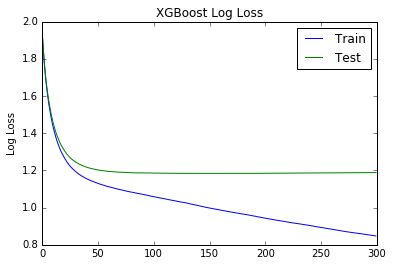

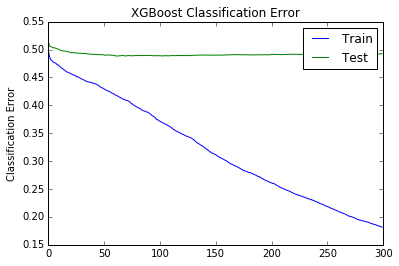

In [72]:
%matplotlib inline

results_xgbclassifier2 = xgbclassifier_model2.evals_result()
epochs = len(results_xgbclassifier2['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier2['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results_xgbclassifier2['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier2['validation_0']['merror'], label='Train')
ax.plot(x_axis, results_xgbclassifier2['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [73]:
from sklearn.metrics import accuracy_score

predictions = defaultdict(list)
accuracy = defaultdict(list)
y_pred = defaultdict(list)

for snr in snrs:
    y_pred[snr] = xgbclassifier_model2.predict(X_test_new[snr])
    predictions[snr] = [round(value) for value in y_pred[snr]]
    accuracy[snr] = accuracy_score(y_test[snr], predictions[snr])
    print ("Test accuracy at ",snr,"dB =", accuracy[snr])

Test accuracy at  -20 dB = 0.1255
Test accuracy at  -18 dB = 0.12325
Test accuracy at  -16 dB = 0.1225
Test accuracy at  -14 dB = 0.1295
Test accuracy at  -12 dB = 0.1405
Test accuracy at  -10 dB = 0.1895
Test accuracy at  -8 dB = 0.25975
Test accuracy at  -6 dB = 0.34725
Test accuracy at  -4 dB = 0.40125
Test accuracy at  -2 dB = 0.45375
Test accuracy at  0 dB = 0.531
Test accuracy at  2 dB = 0.65
Test accuracy at  4 dB = 0.7845
Test accuracy at  6 dB = 0.81925
Test accuracy at  8 dB = 0.82875
Test accuracy at  10 dB = 0.852
Test accuracy at  12 dB = 0.8525
Test accuracy at  14 dB = 0.85425
Test accuracy at  16 dB = 0.84275
Test accuracy at  18 dB = 0.848


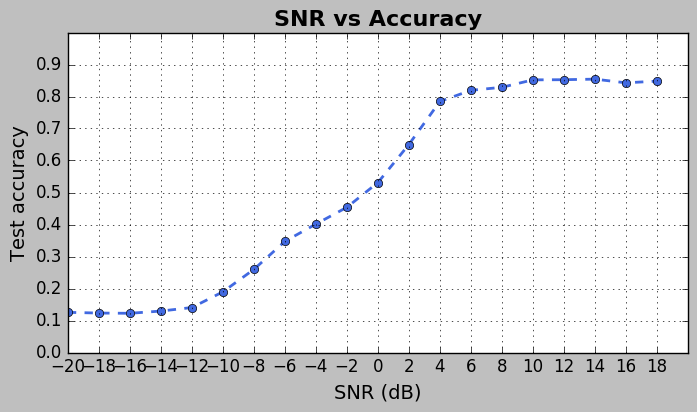

In [74]:
plt.style.use('classic')
acc_test = sorted(accuracy.items())
new_acc = []
for i in range(len(acc_test)):
    new_acc.append(acc_test[i][1])
acc_test_values = new_acc 

fig1 = plt.figure(figsize=(8,4), dpi=100)
x = snrs
y = list(acc_test_values)
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.86  0.00   0.00  0.00  0.00   0.06   0.07  0.01
BPSK   0.00  0.97   0.00  0.00  0.02   0.00   0.01  0.01
CPFSK  0.01  0.00   0.98  0.01  0.00   0.00   0.00  0.00
GFSK   0.01  0.00   0.04  0.94  0.00   0.00   0.01  0.00
PAM4   0.00  0.02   0.00  0.00  0.96   0.01   0.01  0.00
QAM16  0.02  0.00   0.00  0.00  0.00   0.55   0.44  0.00
QAM64  0.01  0.00   0.00  0.00  0.00   0.43   0.55  0.00
QPSK   0.03  0.00   0.00  0.00  0.00   0.05   0.01  0.90


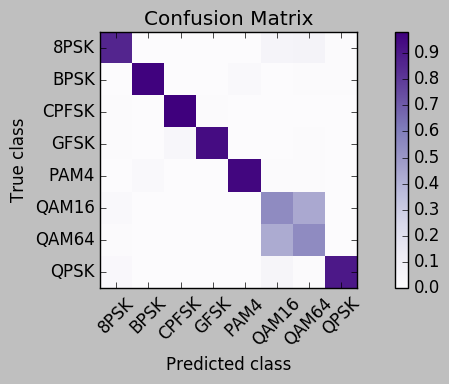

In [75]:
# Confusion Matrix
    
from sklearn.metrics import confusion_matrix

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
conf_matrix = confusion_matrix(y_pred[18], y_test[18])  

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

### Tune trade-off between learning_rate and num_boost_round
Low learning_rate implies more trees must be added to the ensemble; learning_rate is commonly set between 0.1 and 0.3
and also less than 0.1. Our learning_rate of 0.1 found via grid search is high and suggests that the default no. of trees 100 (during grid search) is low and more trees should be added. 

In [8]:
param_grid10 = {'learning_rate': [0.0001, 0.001, 0.01, 0.1], 'n_estimators': [100, 200, 300, 400, 500]}

start = time()

grid_search10 = GridSearchCV(estimator = XGBClassifier(max_depth= 8, min_child_weight= 4, gamma = 0.0, subsample = 0.9, 
                                                      colsample_bytree = 0.85, reg_alpha= 1e-9, reg_lambda= 3, 
                                                      objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid10, scoring= 'accuracy', n_jobs=4)

grid_search10.fit(X_train_new, y_train)
print("Grid search took {} minutes".format((time()-start)/60))

grid_search10.grid_scores_, grid_search10.best_params_, grid_search10.best_score_

Grid search took 103.06827054023742 minutes


([mean: 0.49074, std: 0.00143, params: {'n_estimators': 100, 'learning_rate': 0.0001},
  mean: 0.49074, std: 0.00178, params: {'n_estimators': 200, 'learning_rate': 0.0001},
  mean: 0.49054, std: 0.00184, params: {'n_estimators': 300, 'learning_rate': 0.0001},
  mean: 0.49075, std: 0.00196, params: {'n_estimators': 400, 'learning_rate': 0.0001},
  mean: 0.49104, std: 0.00181, params: {'n_estimators': 500, 'learning_rate': 0.0001},
  mean: 0.49107, std: 0.00162, params: {'n_estimators': 100, 'learning_rate': 0.001},
  mean: 0.49151, std: 0.00143, params: {'n_estimators': 200, 'learning_rate': 0.001},
  mean: 0.49220, std: 0.00131, params: {'n_estimators': 300, 'learning_rate': 0.001},
  mean: 0.49302, std: 0.00166, params: {'n_estimators': 400, 'learning_rate': 0.001},
  mean: 0.49379, std: 0.00142, params: {'n_estimators': 500, 'learning_rate': 0.001},
  mean: 0.49486, std: 0.00051, params: {'n_estimators': 100, 'learning_rate': 0.01},
  mean: 0.49855, std: 0.00061, params: {'n_estimat